In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [86]:
df=pd.read_csv('Final.csv')

In [87]:
df.shape

(9650, 21)

In [88]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2: 50,0,No Info,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7: 25,2,No Info,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5: 25,1,No Info,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4: 45,1,No Info,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2: 25,0,No Info,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0


In [89]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min', 'Duration_bool'],
      dtype='object')

In [90]:
df1=df[['Airline','Source','Destination','Total_Stops','Price','Day','Month','Dep_Hr','Dep_Min','Arr_Hr','Arr_Min','Duration_Hr','Duration_Min']]
df1.shape

(9650, 13)

In [91]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,MAR,22,20,1,10,2,50.0
1,Air India,Kolkata,Banglore,2,7662,1,MAY,5,50,13,15,7,25.0
2,IndiGo,Kolkata,Banglore,1,6218,12,MAY,18,5,23,30,5,25.0
3,IndiGo,Banglore,New Delhi,1,13302,1,MAR,16,50,21,35,4,45.0
4,SpiceJet,Kolkata,Banglore,0,3873,24,JUN,9,0,11,25,2,25.0


In [92]:
from sklearn.preprocessing import LabelEncoder
#Converting Categorical Features into numerical form using LabelEncoder()

le = LabelEncoder()

#For train dataset

df1["Source"] = le.fit_transform(df1["Source"])
df1["Destination"] = le.fit_transform(df1["Destination"])

In [93]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,0,5,0,3897,24,MAR,22,20,1,10,2,50.0
1,Air India,3,0,2,7662,1,MAY,5,50,13,15,7,25.0
2,IndiGo,3,0,1,6218,12,MAY,18,5,23,30,5,25.0
3,IndiGo,0,5,1,13302,1,MAR,16,50,21,35,4,45.0
4,SpiceJet,3,0,0,3873,24,JUN,9,0,11,25,2,25.0


In [94]:
df1.isnull().any()

Airline         False
Source          False
Destination     False
Total_Stops     False
Price           False
Day             False
Month           False
Dep_Hr          False
Dep_Min         False
Arr_Hr          False
Arr_Min         False
Duration_Hr     False
Duration_Min    False
dtype: bool

In [95]:
df1['Month'] = df1['Month'].map({
    'JAN':1,
    'FEB':2,
    'MAR':3,
    'APR':4,
    'MAY':5,
    'JUN':6,
    'JUL':7,
    'AUG':8,
    'SEP':9,
    'OCT':10,
    'NOV':11,
    'DEC':12
})

In [96]:
df1.Airline.value_counts()

Jet Airways                          3367
IndiGo                               1932
Air India                            1628
Multiple carriers                     945
SpiceJet                              813
Vistara                               462
Air Asia                              306
GoAir                                 177
Multiple carriers Premium economy      11
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [97]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,0,5,0,3897,24,3,22,20,1,10,2,50.0
1,Air India,3,0,2,7662,1,5,5,50,13,15,7,25.0
2,IndiGo,3,0,1,6218,12,5,18,5,23,30,5,25.0
3,IndiGo,0,5,1,13302,1,3,16,50,21,35,4,45.0
4,SpiceJet,3,0,0,3873,24,6,9,0,11,25,2,25.0


In [98]:
#mapping

stop = {
    "Jet Airways":0,
    "IndiGo":1,
    "Air India":2,
    "Multiple carriers":3,
    "SpiceJet":4 , 
    "Vistara":5 ,
    "Air Asia":6 , 
    "GoAir":7, 
}


df1.loc[: , "Airline"] = df1["Airline"].map(stop)

In [99]:
df1.isna().sum()

Airline         20
Source           0
Destination      0
Total_Stops      0
Price            0
Day              0
Month            0
Dep_Hr           0
Dep_Min          0
Arr_Hr           0
Arr_Min          0
Duration_Hr      0
Duration_Min     0
dtype: int64

In [108]:
df1 = df1[df.Airline != 'Trujet']

df1 = df1[df.Airline != 'Multiple carriers Premium economy']
df1 = df1[df.Airline != 'Jet Airways Business']
df1 = df1[df.Airline != 'Vistara Premium economy']

In [109]:
df1.isna().sum()

Airline         0
Source          0
Destination     0
Total_Stops     0
Price           0
Day             0
Month           0
Dep_Hr          0
Dep_Min         0
Arr_Hr          0
Arr_Min         0
Duration_Hr     0
Duration_Min    0
dtype: int64

In [110]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,1.0,0,5,0,3897,24,3,22,20,1,10,2,50.0
1,2.0,3,0,2,7662,1,5,5,50,13,15,7,25.0
2,1.0,3,0,1,6218,12,5,18,5,23,30,5,25.0
3,1.0,0,5,1,13302,1,3,16,50,21,35,4,45.0
4,4.0,3,0,0,3873,24,6,9,0,11,25,2,25.0


In [111]:
X=df1.drop('Price',axis=1)
y=df1['Price']

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9630 entries, 0 to 9649
Data columns (total 12 columns):
Airline         9630 non-null float64
Source          9630 non-null int32
Destination     9630 non-null int32
Total_Stops     9630 non-null int64
Day             9630 non-null int64
Month           9630 non-null int64
Dep_Hr          9630 non-null int64
Dep_Min         9630 non-null int64
Arr_Hr          9630 non-null int64
Arr_Min         9630 non-null int64
Duration_Hr     9630 non-null int64
Duration_Min    9630 non-null float64
dtypes: float64(2), int32(2), int64(8)
memory usage: 902.8 KB


In [113]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [114]:
print(selection.feature_importances_)

[0.17147056 0.02074683 0.03468628 0.27984984 0.15209892 0.05851676
 0.02435826 0.02219953 0.03061806 0.0241197  0.16038286 0.0209524 ]


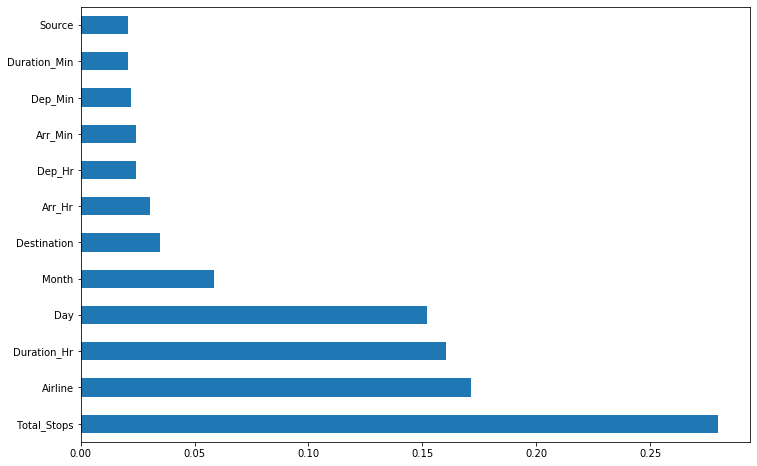

In [115]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [117]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [118]:
X_test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Day', 'Month',
       'Dep_Hr', 'Dep_Min', 'Arr_Hr', 'Arr_Min', 'Duration_Hr',
       'Duration_Min'],
      dtype='object')

In [119]:
y_pred = reg_rf.predict(X_test)

In [120]:
reg_rf.score(X_train, y_train)

0.9523517629244445

In [121]:
reg_rf.score(X_test, y_test)

0.7937575835497903

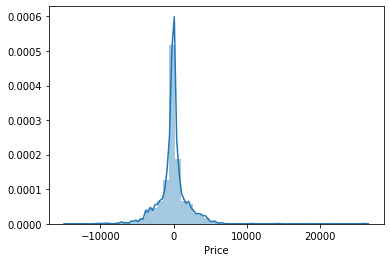

In [122]:
sns.distplot(y_test-y_pred)
plt.show()

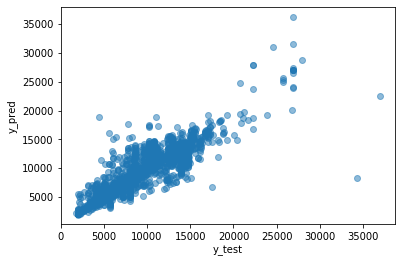

In [123]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [124]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1201.1836041264896
MSE: 4091612.59971134
RMSE: 2022.773491944004


In [125]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.03939455593871898

In [126]:
metrics.r2_score(y_test, y_pred)

0.7937575835497903

## Hyperparameter Tuning

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
#Randomized Search CV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of features to consider at every split
max_features=['auto','sqrt']

#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [129]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [130]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [131]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [132]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [133]:
prediction=rf_random.predict(X_test)

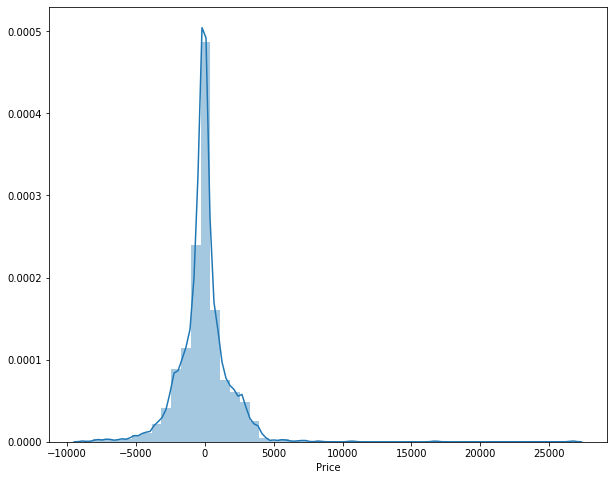

In [134]:
plt.figure(figsize = (10,8))
sns.distplot(y_test-prediction)

Text(0, 0.5, 'y_pred')

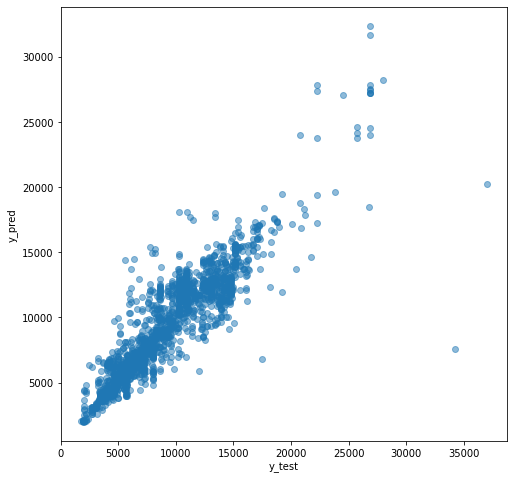

In [135]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [136]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1128.3044345242688
MSE: 3327681.8678018213
RMSE: 1824.1934842011199


In [137]:
metrics.r2_score(y_test,prediction)

0.8322643865058453

## Save the model

In [138]:
import pickle

In [139]:
file=open('flight_fare_rf.pkl','wb')
pickle.dump(reg_rf,file)

In [141]:
model=open('flight_fare_rf.pkl','rb')
forest=pickle.load(model)

In [142]:
y_prediction=forest.predict(X_test)

In [143]:
metrics.r2_score(y_test,y_prediction)

0.7937575835497903